# Logistic Regression for Fun: Phishing Detection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import collections as ct

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import words
from nltk.corpus import wordnet

### note: a second starting point is down below where a pickle file is created for loading, after Jonathan's feature creation.

In [2]:
df = pd.read_csv('~\GitHub\ML_Phishing_Detection\phishing_site_urls.csv')

df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


## High Level Exploration and Cleaning of the Data Frame

In [ ]:
- here's a url that has some data cleaning code
    - https://www.kaggle.com/code/ashishkumarbehera/phishing-site-prediction

In [3]:
len(df)

549346

- (below) let's create a column where `1` is a URL identified as phishing, and `0` is a "good" url.

In [4]:
df['phishing'] = (df.Label == 'bad').astype(int)

In [5]:
df[::10000]

,URL,Label,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1
10000,paypal.com.us-cgi-bin-webscr-cmd.login.5885d80...,bad,1
20000,www.cpiano.com/css/login.htm?us.battle.net/log...,bad,1
30000,buykey.byethost13.com/,bad,1
40000,www.bjcurio.com/js/index.htm?ref=jgmmabgus.bat...,bad,1
50000,www.cyberhorse.net.au/csl/,good,0
60000,www.cse.iitk.ac.in/users/amit/index.html,good,0
70000,ecnow.com/Internet_Marketing.htm,good,0
80000,www.fgroupsoft.com/Traysafe/,good,0
90000,www.xlcus.co.uk/software/acorn/index.shtml#pac...,good,0


In [6]:
df.drop('Label', axis = 1)

,URL,phishing
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1
...,...,...
549341,23.227.196.215/,1
549342,apple-checker.org/,1
549343,apple-iclods.org/,1
549344,apple-uptoday.org/,1


- (below) let's look at the "good" urls and see if we need to do any data cleaning

In [7]:
df[df['phishing'] == 0].iloc[::10000]

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
57904,www.marinesurveyor.com/ogden/,good,0
67904,tools.ietf.org/html/rfc2010,good,0
77904,infohost.nmt.edu/tcc/help/pubs/lang.html,good,0
87904,www.voicecallcentral.com/index.htm,good,0
140671,adirondackexplorer.org/,good,0
150671,blog.revolutionsoccer.net/?p=7383,good,0
160671,companydatabase.org/c/retail-lumber-other-buil...,good,0
170671,en.wikipedia.org/wiki/2010_Portland_Timbers_se...,good,0
180671,en.wikipedia.org/wiki/Sole_proprietorship,good,0


- (below) we suspect there is a data quality issue.  Here is a URL that looks ok.

In [8]:
df["URL"].iloc[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [9]:
df["URL"].str.len().iloc[0]

225

In [10]:
normal_chars = string.printable

sum(v for k, v in ct.Counter(df["URL"].iloc[0]).items() if k in normal_chars)

225

- (below) here is a URL that we are concerned about.

In [11]:
df["URL"].iloc[18232]

"www\x0eeira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùu\x03Ë\nÓ\x176(rTÃ\x06u\x0f\x8f\x7fæ\x82\x0c\x99=g\x810¾\x96÷mÖi\x12Ó-;\x9bXZ\\%êýü\x05Éfn&\x87\\°%7õÙ:¹u\x96\x0f\x161ÌÑêFÄòW<\x18\x80$cï\x86¦t[\x910ò\x9f>Þj\x93®ÆeV2\x92à\x1bpù-íàÇ$E¤ZëÈ²ú\x16SÌ¶\tp\x1fáSò°i°vþ[«³»]¹\rjlÛW¿\x95\x9b\x8a]ø¾µj¿;\x08·ªo!\x94ÒPì\xa0·Ê\x8bïH§#'\x823\x1bø@CÄR\x02õ²çÇ\x17\x17Ý®\x16ö\x1d\x7fQBÇÆg`Èå\x85Zéê\xa0D\x1cîÂm\x9e®ÎÝQó*x;9?\x0fÁ\x19\x81Òâ\x88\x99bùt\x1bÖ\x07\x96Ù®mÞ\x80N\x94\x97P¯°^M\x8eQ\n(\x1f-\x04\x06§;¬ÔAèUè\x99é\\\x10¨ø\x95íÌ\x88dB\\\x01\x8b\x12[q½=ÿVuÃ\x01»\x07râæH\x1bä\x8dô/µ}\x85»7!2=´ÂÏ4¿ª¡j91\x04\x86]"

In [12]:
df["URL"].str.len().iloc[18234]

33

- (below) a function for identifying which rows contain these bad URLs.

In [13]:
def non_printable_indices(col):
    """
    Returns a vector of indices for elements that contain non-printable characters.
    """
    indices = []
    for i, s in col.items():
        if any(c not in string.printable for c in s):
            indices.append(i)
    return indices

In [14]:
bad_URL_rows = non_printable_indices(df["URL"])

In [15]:
bad_df = df.iloc[bad_URL_rows]

In [30]:
bad_df.head()

,URL,Label,phishing
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,0
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,0
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,0
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,0
18235,è kvüDâQÎé4¼Ò©,bad,1


- (below) the weird urls are a little less represented in the "non-phishing" category, but they represent a small portion of total rows so we're going to remove them.

In [16]:
(bad_df['phishing'] == 1).sum()/(bad_df['phishing'] == 0).sum()

0.13279132791327913

In [17]:
(df['phishing'] == 1).sum()/(df['phishing'] == 0).sum()

0.3980973419796195

- (below) the actual removal...

In [18]:
df = df.drop(bad_URL_rows)

<AxesSubplot:xlabel='phishing', ylabel='count'>

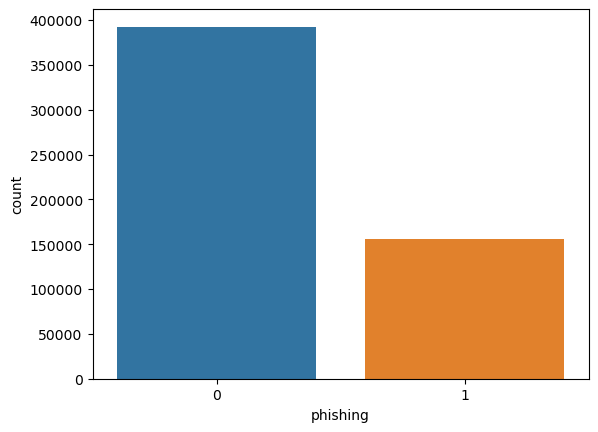

In [19]:
sns.countplot(x="phishing",data=df)

## Feature Engineering
- (below) this is our first feature! a length count of characters.

In [20]:
df['url_length'] = df['URL'].str.len()

In [21]:
df.head()

,URL,Label,phishing,url_length
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177
3,mail.printakid.com/www.online.americanexpress....,bad,1,60
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116


- (below) create a tokenizer object that can be used to split text into tokens based on a regular expression pattern.

In [22]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [23]:
tokenizer.tokenize(df.URL[0]) 

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

- (below) lets apply the tokenizer to every record in df.URL 
   - NOTE:  a lambda function is a small anonymous function that can be defined inline without a name. It's a shorthand way to define a function that takes arguments, performs an operation on them, and returns a value, all in a single line of code.
   - basic syntac is `add = lambda x, y: x + y`
   - `add(3, 5)` will return 8

In [24]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

- (below) along with the tokenized column (which returns a list for each element, let's also create a column that holds concatenated string of the tokenized words instead.

In [25]:
df['text_token_conc'] = df['text_tokenized'].map(lambda l: ' '.join(l))

### Jonathan's Features
- (below) my first feature will be a count of the special characters in each URL.

In [44]:
punct_chars = string.punctuation

In [45]:
df['punct_count'] = df['URL'].apply(lambda string: sum(1 for c in string if c in punct_chars))

- (below) my second feature will count the words within each element of `df['text_tokenized']` that are also found in the english dictionary.
   - NOTE: the nltk library natively contains the words dictionary but may not be comprehensive or appropriate for all use cases. 

In [39]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jonsch\AppData\Roaming\nltk_data...


True

In [40]:
df['num_english_words'] = df['text_tokenized'].apply(lambda tokens: sum([token in wordnet.words() for token in tokens]))

- (above)  the .apply() method to apply a function that takes each list of tokens as input, and returns a scalar value representing the number of English words in the list.
- (above) we use .apply() instead of .map() because the input data is a DataFrame column that contains lists, not a Series of individual elements. 
   - The .apply() method can handle this type of input data, while the .map() method is designed for Series of individual elements.

- (below) my third feature will count the number of case changes in an URL.  I will normalize this by the length of the URL, which we already created earlier.
  - I will first remove all punctuation from the URL.
  - I will consider a case change to be a change from...
      - lower case to upper case.
      - lower case to number.
      - upper case to lower case.
      - upper case to number.
      - number to lower case.
      - number to upper case.

In [46]:
def count_case_changes(string):
    no_punct = ''.join(c for c in string if c not in punct_chars and c != ' ')
    
    chg_counter = 0
    
    prev_char = ''
    
    for char in no_punct:
        if prev_char.islower() and char.isupper():
            chg_counter += 1
        elif prev_char.islower() and char.isdigit():
            chg_counter += 1
        elif prev_char.isupper() and char.islower():
            chg_counter += 1
        elif prev_char.isupper() and char.isdigit():
            chg_counter += 1
        elif prev_char.isdigit() and char.islower():
            chg_counter += 1
        elif prev_char.isdigit() and char.isupper():
            chg_counter += 1
        
        prev_char = char
    
    return chg_counter

In [47]:
df['case_change_count'] = df.URL.map(lambda string: count_case_changes(string))

- (below) save my data frame for later use so we don't need to run the english word check again!

In [48]:
df.head()

,URL,Label,phishing,url_length,text_tokenized,text_token_conc,num_english_words,punct_count,case_change_count
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...,16,32,31
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,7,15,2
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...,15,19,25
3,mail.printakid.com/www.online.americanexpress....,bad,1,60,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...,5,8,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...,2,13,3


In [49]:
df.to_pickle('phishing_df.pkl')

## Modeling
### Loading the pickle file.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_pickle('phishing_df.pkl')

df.head()

,URL,Label,phishing,url_length,text_tokenized,text_token_conc,num_english_words,punct_count,case_change_count
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,225,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...",nobell it ffb d dca cce f login SkyPe com en c...,16,32,31
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,1,81,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,7,15,2
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,177,"[serviciosbys, com, paypal, cgi, bin, get, int...",serviciosbys com paypal cgi bin get into herf ...,15,19,25
3,mail.printakid.com/www.online.americanexpress....,bad,1,60,"[mail, printakid, com, www, online, americanex...",mail printakid com www online americanexpress ...,5,8,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,1,116,"[thewhiskeydregs, com, wp, content, themes, wi...",thewhiskeydregs com wp content themes widescre...,2,13,3


 - (below) one last check for missing or NA values.

In [42]:
null_counts = df.isnull().sum()

null_counts

URL                  0
Label                0
phishing             0
url_length           0
text_tokenized       0
text_token_conc      0
num_english_words    0
punct_count          0
case_change_count    0
dtype: int64

In [43]:
na_counts = df.isna().sum()

na_counts

URL                  0
Label                0
phishing             0
url_length           0
text_tokenized       0
text_token_conc      0
num_english_words    0
punct_count          0
case_change_count    0
dtype: int64

- (below) let's remove the text/tokenized columns to prepare for modeling.

In [44]:
df.columns

Index(['URL', 'Label', 'phishing', 'url_length', 'text_tokenized',
       'text_token_conc', 'num_english_words', 'punct_count',
       'case_change_count'],
      dtype='object')

In [45]:
df_clean = df.loc[:, ['phishing','url_length', 'num_english_words', 'punct_count',
       'case_change_count']]
df_clean.head()

,phishing,url_length,num_english_words,punct_count,case_change_count
0,1,225,16,32,31
1,1,81,7,15,2
2,1,177,15,19,25
3,1,60,5,8,0
4,1,116,2,13,3


In [46]:
df_clean.dtypes

phishing             int32
url_length           int64
num_english_words    int64
punct_count          int64
case_change_count    int64
dtype: object

### Train \ Val \ Test Split
- (below) train \ val \ test split.
- (below) remember, don't look at test until the very end!

In [47]:
df_full_train, df_test = train_test_split(df_clean, test_size=0.20, random_state=2023)

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=2023)

In [48]:
len(df_train)/len(df), len(df_val)/len(df), len(df_test)/len(df)

(0.5999985426139676, 0.20000072869301622, 0.20000072869301622)

- (below) optional, but reset the indices.

In [49]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

- (below) create response vectors. We use the .values method to get a numpy array which most modeling functions require.

In [50]:
type(df_train.phishing), type(df_train.phishing.values)

(pandas.core.series.Series, numpy.ndarray)

In [51]:
y_train = df_train.phishing.values
y_val = df_val.phishing.values
y_test = df_test.phishing.values

- (below) let's delete the response vector from these datasets so we don't accidently feed it into a model
- (below) we'll leave the phising variable in df_full_train in case we do some EDA.

In [52]:
del df_train['phishing']
del df_val['phishing']
del df_test['phishing']

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

- (below) initial training of logistic regression model

In [54]:
X_train = df_train.values

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

- (below) bias term.

In [55]:
w0 = model.intercept_[0] # its a 2d array, we only need 1 row tho.
w0

-1.0346227361233473

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

bias = sigmoid(w0)

print("bias: {}" .format(bias))

bias: 0.2621888723984171


- (above) without knowing anything about a URL, the probability it is a phishing site is thought to be 26.2%.

- (below) coefficients.

In [57]:
model.coef_[0].round(3) # same

array([-0.009,  0.157, -0.033,  0.067])

In [58]:
coefs = dict(zip(df_train.columns, model.coef_[0].round(3)))
coefs

{'url_length': -0.009,
 'num_english_words': 0.157,
 'punct_count': -0.033,
 'case_change_count': 0.067}

#### Predicting the validation set.

In [59]:
from sklearn.metrics import accuracy_score
from collections import Counter

- (below) hard predictions (0, 1)

In [60]:
X_val = df_val.values
model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

- (below) soft predictions (probabilities)
- (below) column 1 is the probability of no phishing, column 2 is the probability of phishing.

In [61]:
model.predict_proba(X_val)

array([[0.81805275, 0.18194725],
       [0.76915892, 0.23084108],
       [0.71724423, 0.28275577],
       ...,
       [0.71275001, 0.28724999],
       [0.77560206, 0.22439794],
       [0.79566811, 0.20433189]])

In [62]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.18194725, 0.23084108, 0.28275577, ..., 0.28724999, 0.22439794,
       0.20433189])

- (below) our first decision rule will be a probability of 0.5

In [63]:
phishing_decision = (y_val_pred >= 0.5)
phishing_decision

array([False, False, False, ..., False, False, False])

- (below) our first accuracy measure

In [64]:
(y_val == phishing_decision).mean()

0.7519993441786749

#### tune the decision threshold

In [65]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_val_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.285
0.05 0.285
0.10 0.285
0.15 0.285
0.20 0.307
0.25 0.519
0.30 0.685
0.35 0.738
0.40 0.755
0.45 0.755
0.50 0.752
0.55 0.749
0.60 0.746
0.65 0.743
0.70 0.740
0.75 0.737
0.80 0.735
0.85 0.733
0.90 0.731
0.95 0.728
1.00 0.715


Text(0, 0.5, 'percent accuracy')

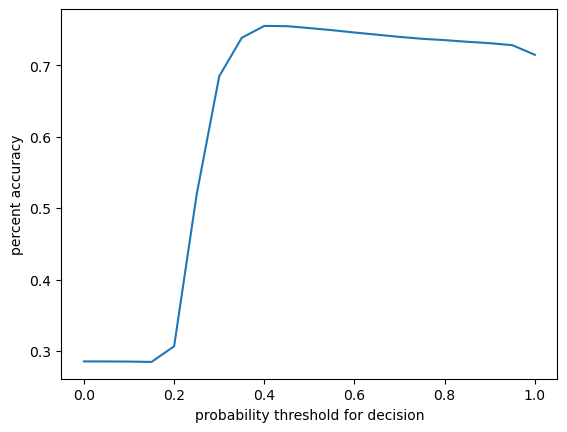

In [66]:
plt.plot(thresholds, scores)

plt.xlabel("probability threshold for decision")

plt.ylabel("percent accuracy")

- (above) looks like 0.45 is a better decision rule.

In [67]:
phishing_decision = (y_val_pred >= 0.45)
phishing_decision

array([False, False, False, ..., False, False, False])

- (below) let's make a prediction table

In [68]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_pred
df_pred['prediction'] = phishing_decision.astype(int)
df_pred['actual'] = y_val
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probability,prediction,actual,correct
0,0.181947,0,1,False
1,0.230841,0,0,True
2,0.282756,0,1,False
3,0.250400,0,0,True
4,0.255890,0,1,False
...,...,...,...,...
109781,0.239699,0,1,False
109782,0.348281,0,0,True
109783,0.287250,0,0,True
109784,0.224398,0,0,True


In [69]:
df_pred.correct.mean()

0.754704607144809

In [70]:
accuracy_score(y_val, y_val_pred >= 0.45)

0.754704607144809

- (below) just double-checking that the model was able to predict some phishing sites...

In [71]:
df_pred[(df_pred['correct'] == True) & (df_pred['prediction'] == 1)]

,probability,prediction,actual,correct
12,0.993436,1,1,True
30,0.977639,1,1,True
53,0.596947,1,1,True
90,0.535634,1,1,True
109,0.524521,1,1,True
...,...,...,...,...
109692,0.534514,1,1,True
109709,0.854676,1,1,True
109727,0.670746,1,1,True
109762,0.559951,1,1,True


- (below) there shouldn't be in any predictions with a 1.0 probability.

In [72]:
len(y_val_pred)

109786

In [73]:
Counter(y_val_pred >= 1.0)

Counter({False: 109786})

- (below) we need to be aware of class balance.

In [74]:
print('non-phishing sites: {}' .format(np.bincount(y_val)[0]))
print('phishing sites: {}' .format(np.bincount(y_val)[1]))
print('there are {:.2f} times as many non-phishing sites as phishing sites'.format(np.bincount(y_val)[0] / np.bincount(y_val)[1]))

non-phishing sites: 78457
phishing sites: 31329
there are 2.50 times as many non-phishing sites as phishing sites


- (below) accuracy predicting phishing sites...

In [75]:
df_pred[df_pred['actual'] == 1].correct.mean()

0.16684222286060837

- (below) accuracy predicting good sites...

In [76]:
df_pred[df_pred['actual'] == 0].correct.mean()

0.9894464483729941